# Neural Network Regression with Tensorflow
Predicting a numerical variable through a combination of other variables
- How Much
- How Many
- Coordinates of object detection problem

In [197]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from tensorflow.keras.utils import plot_model
print(f'Tensorflow Version: {tf.__version__}')

Tensorflow Version: 2.17.0


In [198]:
# Clear out the session
tf.keras.backend.clear_session()

## Steps in modeling
1. Create a model - define input & output layers, as well as hidden layers of deep learning model
2. Compile a model - define loss function, optimizer, and evaluation metrix
3. Fitting a model - let model attempt to find patterns between X and y
4. Evaulating a model
5. Improve through experimentation
6. Using a model to make predictions (save and reload trained model)

### Sample Regression Data

In [199]:
X = tf.cast(x=np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]), dtype=tf.float16)
y = tf.cast(x=np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]), dtype=tf.float16)

Text(0.5, 1.0, 'Scatterplot of X vs y')

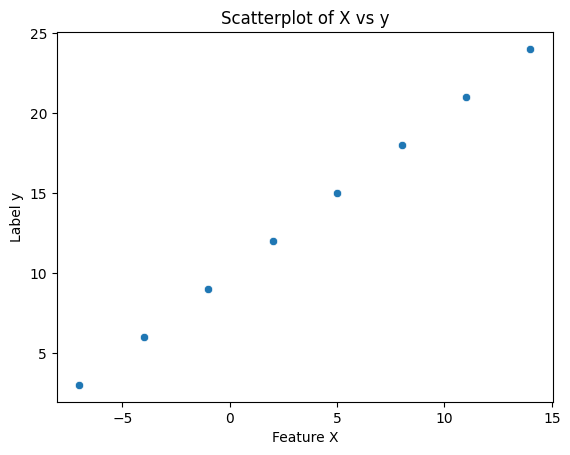

In [200]:
# Visualize
sns.scatterplot(x=X, y=y)
plt.xlabel('Feature X')
plt.ylabel('Label y')
plt.title('Scatterplot of X vs y')

In [201]:
# Show relationship
y  == X + 10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

In [202]:
# Create demo tensor
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [203]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

## Major Steps in Model Building

In [204]:
# set seed
tf.random.set_seed(42)

# 1. Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit a model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step - loss: 11.1554 - mae: 11.1554
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.0229 - mae: 11.0229
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.8904 - mae: 10.8904
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.7579 - mae: 10.7579
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.6254 - mae: 10.6254
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.4929 - mae: 10.4929
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.3604 - mae: 10.3604
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10.2279 - mae: 10.2279
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.0954 - mae: 10.0954
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 9.9629 - mae: 9.9629


In [205]:
# 4 Make predictions on 3 different X values
X_test = tf.cast(x=tf.constant([17.0, 30.0, 45.0]), dtype=tf.float16)
y_pred = model.predict(x=X_test)
i = 0
for pred in y_pred:
    print(f'Given {X_test[i]}, Predicted Value: {pred}')
    i += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Given 17.0, Predicted Value: [17.437832]
Given 30.0, Predicted Value: [30.696173]
Given 45.0, Predicted Value: [45.99426]


## The Details
### Definitions
* **Loss** - how wrong model's predictions are compared to the truth labels
* **Optimizer** - How model should update its internal patterns to better its predictions
* **Metrics** - Human interpretable values for how well the model is doing
* **Epochs** - How many times the model will go through the training data

### Sequential API

**What is the Sequential API?**
The Sequential API is the simplest way to build neural networks in TensorFlow. It allows you to create models layer-by-layer in a step-by-step fashion. This API is ideal for straightforward architectures where each layer has exactly one input tensor and one output tensor.
Key Concepts:

**Sequential Model**: A linear stack of layers.
* Layers: Building blocks of neural networks (e.g., Dense, Conv2D, LSTM).
* Input Shape: The shape of the input data.
* Activation Functions: Non-linear functions applied to the output of each layer (e.g., ReLU, sigmoid, softmax).

*Advantages of the Sequential API*:
1. Simple and intuitive for beginners
2. Quick to prototype basic neural networks
3. Suitable for a wide range of common architectures

*Limitations*:
1. Limited to single-input, single-output stacks of layers
2. Not suitable for models with multiple inputs or outputs, or models with shared layers


*When to Use*:
* For beginners learning deep learning
* For simple feed-forward neural networks
* When rapid prototyping is needed

*Example Use Cases*:
* Binary and multi-class classification
* Simple regression problems
* Basic image classification tasks

### MAE
**Mean Absolute Error (MAE)** is the average of the absolute differences between the predicted values and the actual values. It gives us an idea of how far off our predictions are on average.

*Advantages*:
1. MAE is robust to outliers compared to Mean Squared Error (MSE).
2. It's intuitive and easy to understand.
3. It gives equal weight to all errors

*Considerations*
1. MAE doesn't penalize large errors as heavily as MSE, which might be a disadvantage in some scenarios.
2. It's not differentiable at zero, which can sometimes cause issues with gradient-based optimization.

### Optimizer - SGD

*Definition*:
Stochastic Gradient Descent (SGD) is an optimization algorithm used to minimize the loss function in machine learning models. It's an iterative method for optimizing an objective function with suitable smoothness properties.

*How it works*:
SGD updates the model parameters (weights and biases) in the opposite direction of the gradient of the loss function.
"Stochastic" refers to the fact that it uses randomly selected samples (or small batches) to evaluate the gradients, rather than the entire dataset.


*Key components*:
* Learning rate: Determines the step size at each iteration while moving toward minimum of the loss function.
* Momentum: Helps accelerate SGD in the relevant direction and dampens oscillations.

Process:
* Initialize model parameters randomly
* For each epoch:
> Shuffle the training data
* For each mini-batch:

>> Compute the gradient of the loss with respect to the parameters

>> Update the parameters in the opposite direction of the gradient

*Advantages*:
1. Computationally efficient, especially for large datasets
2. Can escape local minima due to its stochastic nature
3. Often converges faster than batch gradient descent

*Considerations*:
1. The learning rate is a crucial hyperparameter that needs tuning
2. Can be noisy due to frequent updates with small batches
3. May take longer to converge compared to more advanced optimizers like Adam

### Optimizer - Adam

**Definition**

Adam (Adaptive Moment Estimation) is an advanced optimization algorithm that combines ideas from two other extensions of stochastic gradient descent: AdaGrad and RMSProp. It's widely used in deep learning due to its efficiency and good performance across a wide range of problems.

**How it works**

Adam adapts the learning rates of each parameter using estimates of first and second moments of the gradients. This means it can handle non-stationary objectives and problems with very noisy or sparse gradients.

**Key components**
1. **Learning rate (α)**: The step size for updates.
2. **β1**: The exponential decay rate for the first moment estimates (typically 0.9).
3. **β2**: The exponential decay rate for the second moment estimates (typically 0.999).
4. **ε**: A small constant for numerical stability (typically 10^-8).

**Advantages**
* Adaptive learning rates for each parameter
* Handles sparse gradients well
* Efficiently handles non-stationary objectives
* Little memory requirement
* Invariant to diagonal rescaling of gradients

**Considerations**
* Can sometimes fail to converge to an optimal solution (this issue is addressed in newer variants like AdamW)
* May sometimes generalize worse than SGD with momentum
* The adaptive learning rate can sometimes lead to premature stopping of training

**When to Use**
* As a default choice for many deep learning applications
* When dealing with large datasets and high-dimensional parameter spaces
* When you want faster convergence and don't want to tune the learning rate manually

**Comparison w/ SGD**
Adam tends to decrease the learning rate more quickly and adaptively, which often leads to faster convergence.

## Steps in Improving a Model

In [206]:
# More epochs -> more times looking at training data
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.8304 - mae: 9.8304
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.6979 - mae: 9.6979
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 9.5654 - mae: 9.5654
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.4329 - mae: 9.4329
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.3004 - mae: 9.3004
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.1679 - mae: 9.1679
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.0354 - mae: 9.0354
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.9029 - mae: 8.9029
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.7704 - mae: 8.7704
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.6379 - mae: 8.6379
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.5054 - mae: 8.5054
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.3729 - mae: 8.3729
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/ste

In [207]:
# 4 Make predictions on 3 different X values
X_test = tf.cast(x=tf.constant([17.0, 30.0, 45.0]), dtype=tf.float16)
y_pred = model.predict(x=X_test)
i = 0
for pred in y_pred:
    print(f'Given {X_test[i]}, Predicted Value: {pred}')
    i += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Given 17.0, Predicted Value: [30.13782]
Given 30.0, Predicted Value: [52.49615]
Given 45.0, Predicted Value: [78.29423]


In [208]:
# Make a better model
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
              metrics=['mae'])

# fit model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.8754 - mae: 13.8754
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.5000 - mae: 11.5000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.7091 - mae: 8.7091
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4.8075 - mae: 4.8075
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.1294 - mae: 6.1294
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.0112 - mae: 8.0112
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.6453 - mae: 6.6453
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 4.7330 - mae: 4.7330
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.8254 - mae: 3.8254
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5.1110 - mae: 5.1110
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.6567 - mae: 5.6567
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5.5993 - mae: 5.5993
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/s

In [209]:
# 4 Make predictions on 3 different X values
X_test = tf.cast(x=tf.constant([17.0, 30.0, 45.0]), dtype=tf.float16)
y_pred = model.predict(x=X_test)
i = 0
for pred in y_pred:
    print(f'Given {X_test[i]}, Predicted Value: {pred}')
    i += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Given 17.0, Predicted Value: [29.803835]
Given 30.0, Predicted Value: [44.78585]
Given 45.0, Predicted Value: [62.84969]


### KEY TAKEAWAY: More Complex Models are not always better!
They do not generalize well

## Evaluating a Model

### Visualize

> *good to visualize*
* The data
* the model itself
* the training of a model - how does a model perform while it learns
* the predictions of the model vs. ground truth

In [210]:
# Make bigger dataset
X = tf.cast(x=tf.range(-100, 100, 4), dtype=tf.int16)
X

<tf.Tensor: shape=(50,), dtype=int16, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int16)>

In [211]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int16, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int16)>

Text(0.5, 1.0, 'Scatterplot of X vs y')

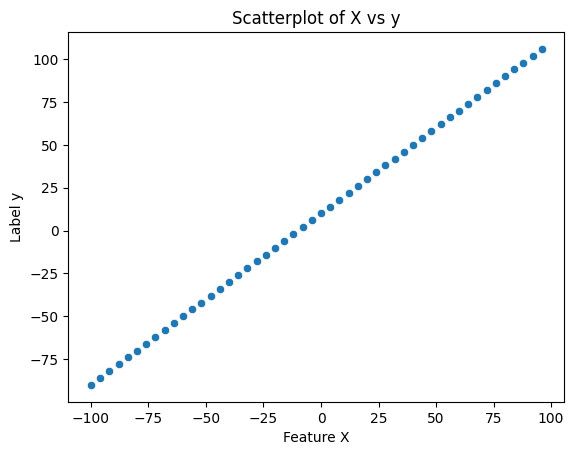

In [212]:
# Visualize
sns.scatterplot(x=X, y=y)
plt.xlabel('Feature X')
plt.ylabel('Label y')
plt.title('Scatterplot of X vs y')

### The three datasets
1. **Training set** - The sample of data used to fit the model. (70 to 80%)
2. **Validation set** - The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration. (10 to 15%)
3. **Test Set** - the model gets evaluated on this data to test what it has learned. (10 to 15% of the data)

In [213]:
# Not random, first 80% of data
train_len = int(len(X) * .8)
X_train = X[:train_len]
y_train = y[:train_len]
X_test = X[train_len:]
y_test = y[train_len:]

### Visualize training and test sets

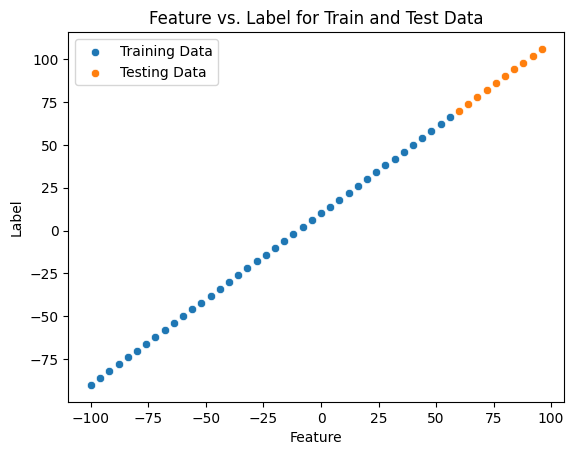

In [214]:
sns.scatterplot(x=X_train, y=y_train, label='Training Data')
sns.scatterplot(x=X_test, y=y_test, label='Testing Data')

# Add x and y axis labels
plt.xlabel('Feature')  # Replace with your actual X-axis label
plt.ylabel('Label')  # Replace with your actual Y-axis label

# Add a title
plt.title('Feature vs. Label for Train and Test Data')  # Replace with your desired title

# Add a legend
plt.legend()
plt.show()

### Getting a Model Summary

In [215]:
# Create an example model

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae', 'mse'])

# 3. Fit model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2661.5444 - mae: 44.3684 - mse: 2661.5444
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2146.9265 - mae: 39.9316 - mse: 2146.9265
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1726.5101 - mae: 35.8497 - mse: 1726.5101 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1367.0569 - mae: 31.9389 - mse: 1367.0569
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1079.6730 - mae: 28.3866 - mse: 1079.6730
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 846.3077 - mae: 25.0960 - mse: 846.3077
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 656.3759 - mae: 22.0397 - mse: 656.3759
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 500.9415 - mae: 19.1067 - mse: 500.9415
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 382.0346 - mae: 16.4677 - mse: 382.0346
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 289.6582 - mae: 14.0546 - mse: 289.6582
Epoch 11/

**See the model summary**

In [216]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,205 (121.90 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,804 (81.27 KB)

### Visualizing a Model's layers

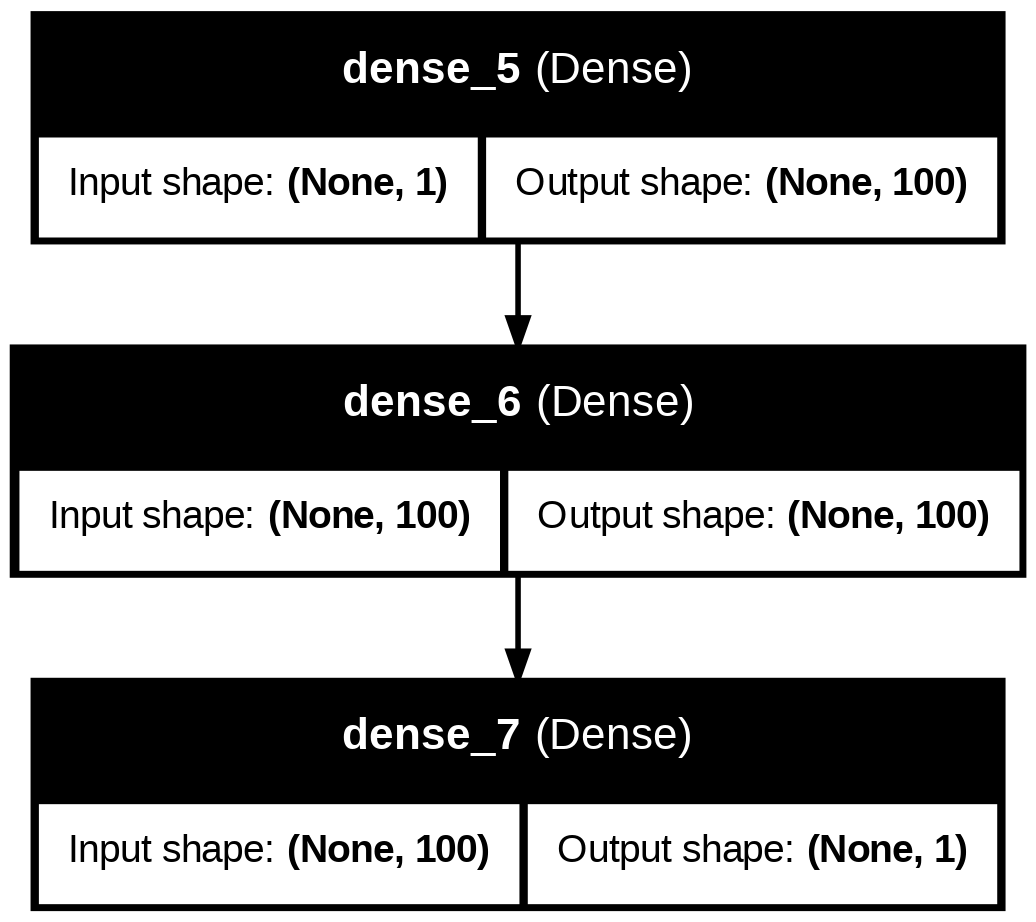

In [217]:
plot_model(model=model, show_layer_names=True, show_shapes=True)

### Visualize model's predictions

In [218]:
# get predictions
y_pred = model.predict(x=X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [219]:
# Plot them vs actual
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  # Convert data to same type
  train_data = np.ravel(train_data.numpy())
  train_labels = np.ravel(train_labels.numpy())
  test_data = np.ravel(test_data.numpy())
  test_labels = np.ravel(test_labels.numpy())
  predictions = np.ravel(predictions)

  # Plot
  sns.scatterplot(x=train_data, y=train_labels, label='Training Data')
  sns.scatterplot(x=test_data, y=test_labels, label='Testing Data')
  sns.scatterplot(x=test_data, y=predictions, label='Predictions')
  plt.legend()

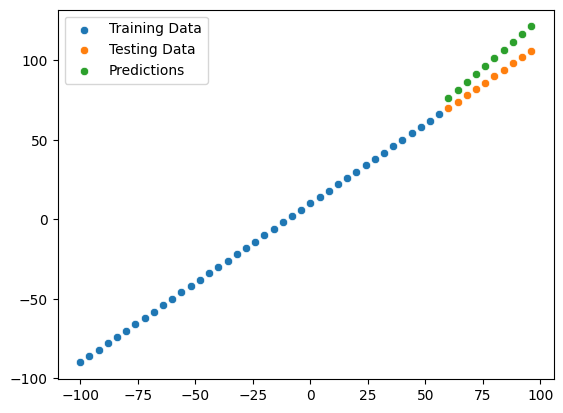

In [220]:
plot_predictions()

### Evaluating our model's predictions w/ regression evaluation metrics
**Top 3**
* MAE - mean absolute error. "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"; use when larger errors are more significant than smaller errors
* Huber - combo of MSE and MAE.

In [221]:
# Evaluate the model on the test data set
model.evaluate(x=tf.expand_dims(X_test, axis=-1), y=y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 122.8118 - mae: 10.6985 - mse: 122.8118


[122.81178283691406, 10.698519706726074, 122.81178283691406]

In [222]:
# Calculate mean absolute error

# First check shapes
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [223]:
# Make same shape by squeezing 1 dimension out
y_pred = tf.squeeze(y_pred)

mae = tf.keras.losses.mae(y_true=y_test, y_pred=y_pred).numpy()
mae

10.69852

In [224]:
# Calculate mean square error
mse = tf.keras.losses.mse(y_true=y_test, y_pred=y_pred).numpy()
mse

122.81178

## Setting up Tensorflow Modeling Experiments

**experiment to improve model**

In [225]:
tf.random.set_seed(42)

# base model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 113.8407 - mae: 113.8407
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 112.9704 - mae: 112.9704 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 112.1010 - mae: 112.1010 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 111.2317 - mae: 111.2317
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 110.3623 - mae: 110.3623
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 109.4929 - mae: 109.4929
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 108.6234 - mae: 108.6234
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 107.7547 - mae: 107.7547 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 106.8894 - mae: 106.8894
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 106.0254 - mae: 106.0254


In [226]:
tf.random.set_seed(42)

# 2 layers trained for 100 epochs
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_1.add(tf.keras.layers.Dense(1))

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 37.6419 - mae: 37.6419
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.4135 - mae: 26.4135 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.5119 - mae: 15.5119 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8429 - mae: 5.8429 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6891 - mae: 8.6891 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.9855 - mae: 10.9855 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.0962 - mae: 9.0962
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3533 - mae: 6.3533 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4799 - mae: 6.4799
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.9531 - mae: 5.9531
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.1528 - mae: 5.1528
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5657 - mae: 4.5657
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [227]:
tf.random.set_seed(42)

# 2 layers trained by 500 epochs
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 41.4031 - mae: 41.4031
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32.3046 - mae: 32.3046 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.3388 - mae: 23.3388 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.4654 - mae: 14.4654
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.1378 - mae: 7.1378 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.7885 - mae: 7.7885
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.0944 - mae: 10.0944 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.1825 - mae: 9.1825 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3905 - mae: 6.3905 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.3173 - mae: 6.3173
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.9420 - mae: 5.9420
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.4940 - mae: 5.4940
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

### Compare the models

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


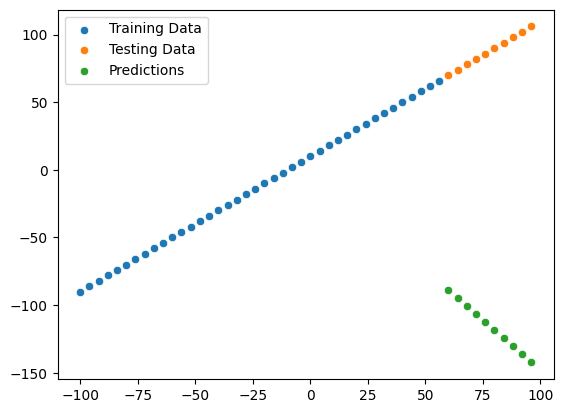

In [228]:
# base model
y_pred_base = model.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_pred_base)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


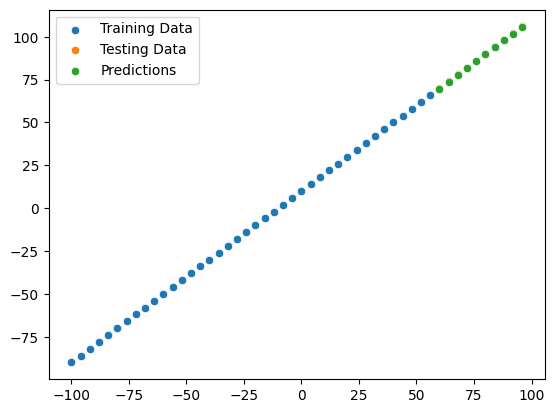

In [229]:
# Second model
y_pred_1 = model_1.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_pred_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


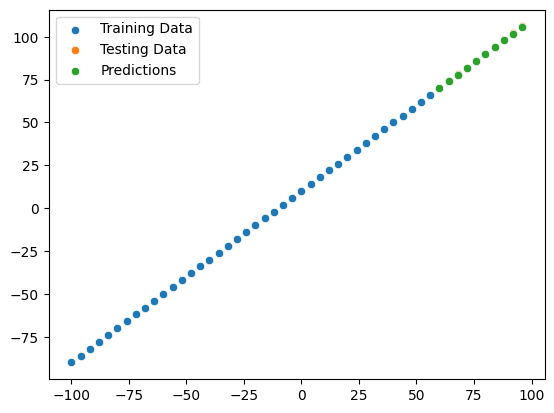

In [230]:
# model 3 plotted
y_pred_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_pred_2)

In [231]:
# Compare the MAE's - cleanly, with a pandas df
model_base_mae = tf.keras.losses.mae(y_test, tf.squeeze(y_pred_base)).numpy()
model_1_mae = tf.keras.losses.mae(y_test, tf.squeeze(y_pred_1)).numpy()
model_2_mae = tf.keras.losses.mae(y_test, tf.squeeze(y_pred)).numpy()
model_base_mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred_base)).numpy()
model_1_mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred_1)).numpy()
model_2_mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred)).numpy()

model_results = {'model': ['base_model', 'model_1', 'model_2'],
                 'mae': [model_base_mae, model_1_mae, model_2_mae],
                 'mse': [model_base_mse, model_1_mse, model_2_mse]}

model_df = pd.DataFrame(model_results)
model_df

,model,mae,mse
0,base_model,203.772308,42336.179688
1,model_1,0.216476,0.054015
2,model_2,10.698520,122.811783


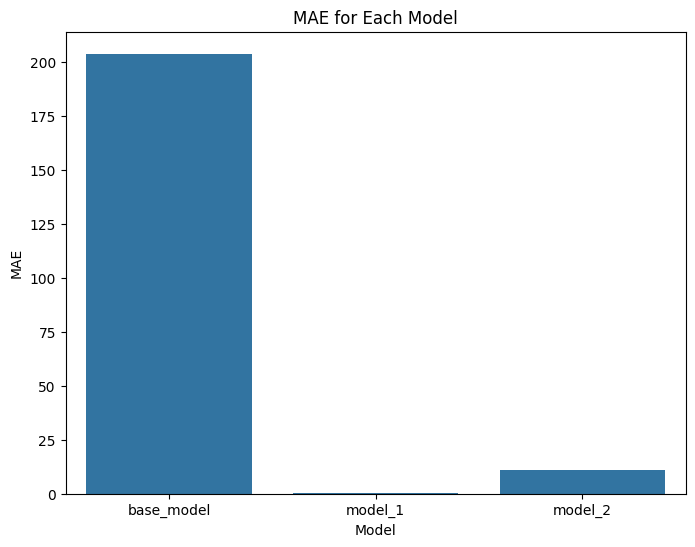

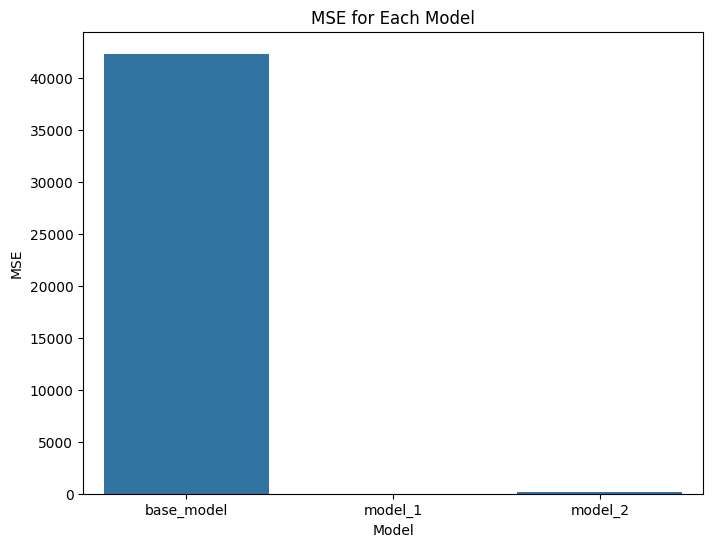

In [232]:
# Plot MAE for each model
plt.figure(figsize=(8, 6))
sns.barplot(x='model', y='mae', data=model_df)
plt.title('MAE for Each Model')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()

# Plot MSE for each model
plt.figure(figsize=(8, 6))
sns.barplot(x='model', y='mse', data=model_df)
plt.title('MSE for Each Model')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.show()


## Saving and Loading a Model

Saving our models allows us to use them outside of Google Colab (or wherevere they were trained) such as in a web application or Algorithmic Trade *Bot*

In [233]:
# Saving the best model
model_1.save('best_model.keras')

In [234]:
# Load model
loaded_model = tf.keras.models.load_model('/content/best_model.keras')

In [235]:
# Make sure it loaded
loaded_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

### Practice

In [236]:
# Data
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [238]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [239]:
# One hot encode dataframe all willy nilly like
df = pd.get_dummies(df)

In [240]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   bool   
 5   sex_male          1338 non-null   bool   
 6   smoker_no         1338 non-null   bool   
 7   smoker_yes        1338 non-null   bool   
 8   region_northeast  1338 non-null   bool   
 9   region_northwest  1338 non-null   bool   
 10  region_southeast  1338 non-null   bool   
 11  region_southwest  1338 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 52.4 KB


In [242]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [243]:
# Convert bools to ints
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0



 Build model (I'm going to just do 2 for practice)

In [244]:
# Split features and labels
X = df.drop('charges', axis=1)
y = df['charges']

In [245]:
# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [246]:
# For knowledge sake - let's see what mean and median is to compare our model against
y_test.mean(), y_test.median()

(12968.317062869404, 8487.8803)

In [247]:
# Build model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# Fit model
model_history = model.fit(X_train, y_train, epochs=100, verbose=0)

Text(0.5, 0, 'epochs')

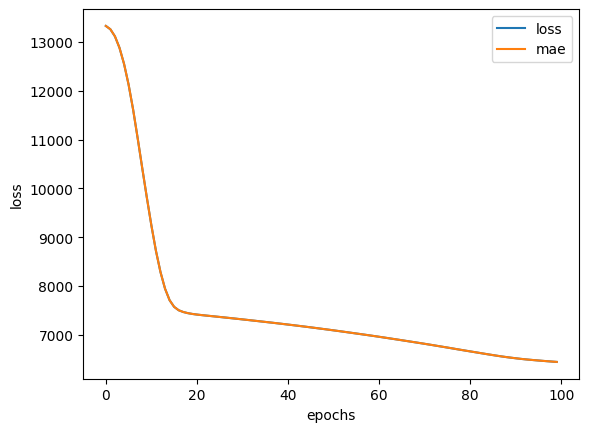

In [248]:
# Show training curves
pd.DataFrame(model_history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [249]:
# Evaluate model
model.evaluate(tf.expand_dims(X_test, axis=-1), y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6495.7412 - mae: 6495.7412  


[6306.71630859375, 6306.71630859375]

In [250]:
# Predictions
model_y_pred = model.predict(tf.expand_dims(X_test, axis=-1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [251]:
# Model 2

# Create
model_plus = tf.keras.Sequential()
model_plus.add(tf.keras.layers.Dense(10, activation='relu'))
model_plus.add(tf.keras.layers.Dense(5, activation='relu'))
model_plus.add(tf.keras.layers.Dense(1))

# Compile
model_plus.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.056),
                   metrics=['mae'])

# Fit
model_plus_history = model_plus.fit(X_train, y_train, epochs=300, verbose=0)

Text(0.5, 0, 'epochs')

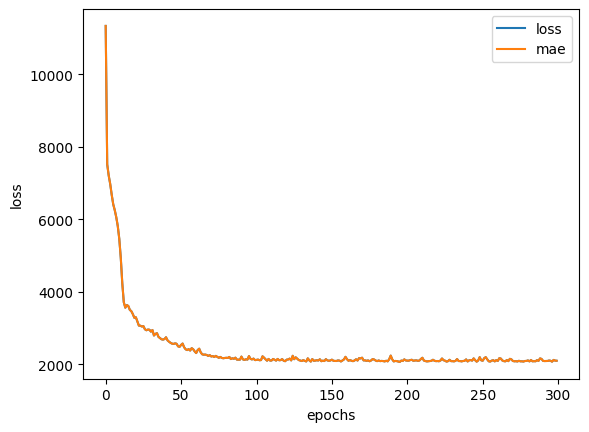

In [252]:
# Show training curves
pd.DataFrame(model_plus_history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [253]:
# Evaluate model
model_plus.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1790.8021 - mae: 1790.8021  


[1796.213134765625, 1796.213134765625]

### How Long to Train (# of Epochs)?
Use [EarlyStoppping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping): Will train until loss stops decreasing!

## Preprocessing Data (Normalization & Standardization) with Feature Scaling
**Normalization:** Sklearn MinMaxScalar
* Scales features to a fixed range, typically [0, 1]
* Formula: X_norm = (X - X_min) / (X_max - X_min)
* Preserves zero values and the distribution's shape
* Useful when you need bounded values. Use as default

**Standardization:** Sklearn StandardScalar
* Transforms features to have zero mean and unit variance
* Formula: X_stand = (X - μ) / σ
* Results in features centered around zero with standard deviation of 1
* Better for features with Gaussian (Normal) distribution and when outliers are important

> Both techniques help in scaling features to a common range, which can improve the performance and convergence of many machine learning algorithms. If in doubt, try both and see which performs better

*NOTE* - don't need to scale Label, only Features

In [254]:
# Read in data fresh
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


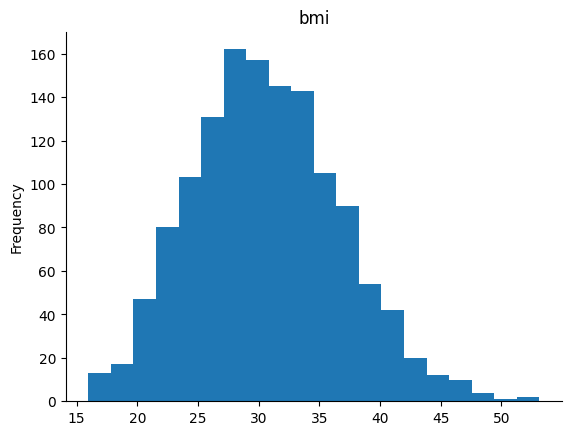

In [255]:
# Show a feature before scaling
df['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [256]:
# Normalize numerical features

# Make a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # Turn numerical values to be between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']) # turn categorical features into 0's and 1's
)

ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [257]:
# Create X y
X = df.drop('charges', axis=1)
y = df['charges']

In [258]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [259]:
# Look at data now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [260]:
# Build model a complex model for practice
tf.random.set_seed(42)

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_normal.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train_normal, y_train,
                    epochs=200,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 12694.5820 - mae: 12694.5820 - val_loss: 12655.1689 - val_mae: 12655.1689
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12692.3906 - mae: 12692.3906 - val_loss: 12654.2266 - val_mae: 12654.2266
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12688.8662 - mae: 12688.8662 - val_loss: 12652.1445 - val_mae: 12652.1445
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12681.9434 - mae: 12681.9434 - val_loss: 12646.9814 - val_mae: 12646.9814
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12667.5850 - mae: 12667.5850 - val_loss: 12634.6406 - val_mae: 12634.6406
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12639.6357 - mae: 12639.6357 - val_loss: 12606.2158 - val_mae: 12606.2158
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12581.4561 - mae: 12581.4561 - val_loss: 12546.5537 - val_mae: 12546.5537
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12476.7148 - mae: 124

Text(0, 0.5, 'Loss')

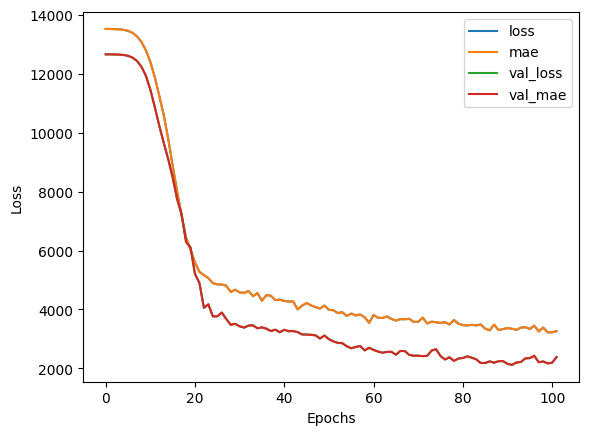

In [261]:
# Plot Training Curve
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [262]:
# Evaluate
model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2065.3591 - mae: 2065.3591 


[2049.858642578125, 2049.858642578125]